## **Business Problem Understanding**

### **Context**

The bike-sharing system is a new generation of traditional bike rental where the entire process, from membership, rental, and return of the bike, is automated. Through this system, users can easily rent a bike from a certain position and return it at another position. Currently, there are more than 500 bike-sharing programs around the world consisting of more than 500 thousand bikes. Currently, there is great interest in this system due to its important role in traffic, environmental and health issues.
Apart from the interesting real-world applications of bike-sharing systems, the characteristics of the data generated by these systems make them interesting to research. Unlike other transportation services such as buses or subways, trip duration, departure and arrival positions are explicitly recorded in these systems. This feature turns the bike-sharing system into a virtual sensor network that can be used to sense mobility in the city. Therefore, it is expected that important events in the city can be detected by monitoring this data.


### **Problem Statement**

The simplicity of bike-sharing systems in bicycle rental does not dictate the number of renters, although these traditional bicycle rentals play an important role in traffic, environmental and health issues. So it is possible that the bicycles provided for rental are not used, which leads to increased maintenance costs to renew the bicycles. **Since the ease of rental still does not lead to more renters and may increase maintenance costs, it is necessary to investigate other factors during rental**, such as rental time, air humidity, air temperature, and the season during rental.

### **Goals**

From this problem, the bike-sharing system needs a tool to predict the number of renters based on these factors **so that the bike-sharing system can streamline the number of bikes offered for rent**. 
Predicting the number of renters will streamline the number of bikes offered so that the increase in maintenance costs due to unused bikes can be reduced.

### **Analytical Approach**

So, what we need to do is analyze the data to find patterns in the features that differentiate the number of renters based on the conditions. 

Next, we will build a regression model that will help the bike-sharing system to provide a renter prediction tool, which will be useful to determine how many bikes to rent out.

### **Metrics Evaluation**

The evaluation metrics to be used are RMSE, MAE, and MAPE :
 - **RMSE (Root Mean Square Error)**:
RMSE is a measure of how well the regression model fitted the actual data.
It measures the extent of the difference between the actual value and the value predicted by the model.
RMSE is calculated by taking the square root of the mean square of the error (the difference between the actual value and the predicted value).
The smaller the RMSE value, the better the model is at predicting the data.
 - **MAE (Mean Absolute Error)**:
MAE is an evaluation metric that measures the average of the absolute errors (unsquared) between the actual value and the value predicted by the model.
MAE provides information about the extent of the error in the prediction, regardless of whether the error is larger or smaller than the actual value.
MAE also describes the extent to which the regression model actually approximates the actual values.
 - **MAPE (Mean Absolute Percentage Error)**:
MAPE is an evaluation metric that measures the average of the absolute percentage errors between the actual value and the value predicted by the model.
MAPE is useful for measuring the extent of the prediction error as a percentage of the actual value.
It is often used in the context of forecasting and helps in understanding the degree of accuracy of the prediction relative to the actual magnitude.<br>

A good understanding of these three metrics is important in evaluating how well a regression model performs. Each metric has its own utility depending on the context of the problem and preference in error measurement. The smaller the RMS value

## **Data Understanding**

In [1]:
# Library Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

bs=pd.read_csv('data_bike_sharing.csv')
bs.head()


dteday   hum  weathersit  holiday  season   atemp  temp  hr  casual  \
0  2011-12-09  0.62           1        0       4  0.3485  0.36  16      24   
1  2012-06-17  0.64           1        0       2  0.5152  0.54   4       2   
2  2011-06-15  0.53           1        0       2  0.6212  0.62  23      17   
3  2012-03-31  0.87           2        0       2  0.3485  0.36   8      19   
4  2012-07-31  0.55           1        0       3  0.6970  0.76  18      99   

   registered  cnt  
0         226  250  
1          16   18  
2          90  107  
3         126  145  
4         758  857

|No. | Features | Remark |
|----|----------|--------|
|1.|dteday| date|
|2.|season| season (1: winter, 2: spring, 3: summer, 4: fall)|
|3.|hr| hour (0 to 23)|
|4.|holiday| holiday or not|
|5.|temp| normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale)|
|6.|atemp| Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale)|
|7.|hum| normalized humidity. The values are divided into 100 (max)|
|8.|casual| count of casual users|
|9.|registered| count of registered users|
|10.|cnt| count of total rental bikes including both casual and registered|
|11.|weathersit|1: Clear, Few clouds, Partly cloudy, Partly cloudy|
|---||2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist|
|---||3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds|
|---||4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|


This dataset is the records of how many bike renters in 2012 to 2013 with weather and time condition. At the first row there was 'dteday' feature, which mean date. From feature remark we could see that 'cnt' is the sum of 'casual' and 'registered', we can conclude that 'casual' and 'registered' column is the part of 'cnt' which is count of bike renters in one day.

### **Data Wrangling**

In [2]:
# Data information
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      12165 non-null  object 
 1   hum         12165 non-null  float64
 2   weathersit  12165 non-null  int64  
 3   holiday     12165 non-null  int64  
 4   season      12165 non-null  int64  
 5   atemp       12165 non-null  float64
 6   temp        12165 non-null  float64
 7   hr          12165 non-null  int64  
 8   casual      12165 non-null  int64  
 9   registered  12165 non-null  int64  
 10  cnt         12165 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.0+ MB


In [66]:
bs.describe()

hum    weathersit       holiday        season         atemp  \
count  12165.000000  12165.000000  12165.000000  12165.000000  12165.000000   
mean       0.625451      1.416934      0.029758      2.488615      0.476996   
std        0.192102      0.635937      0.169925      1.106157      0.171857   
min        0.000000      1.000000      0.000000      1.000000      0.000000   
25%        0.470000      1.000000      0.000000      2.000000      0.333300   
50%        0.620000      1.000000      0.000000      2.000000      0.484800   
75%        0.780000      2.000000      0.000000      3.000000      0.621200   
max        1.000000      4.000000      1.000000      4.000000      1.000000   

               temp            hr        casual    registered           cnt  
count  12165.000000  12165.000000  12165.000000  12165.000000  12165.000000  
mean       0.498185     11.519770     35.834443    153.436580    189.271023  
std        0.192492      6.931872     49.489286    151.046123    181.223903  
min        0.020000      0.000000      0.000000      0.000000      1.000000  
25%        0.340000      6.000000      4.000000     34.000000     40.000000  
50%        0.500000     12.000000     17.000000    115.000000    142.000000  
75%        0.660000     18.000000     49.000000    220.000000    282.000000  
max        1.000000     23.000000    362.000000    876.000000    970.000000

In [67]:
bs.describe(include='object')

dteday
count        12165
unique         731
top     2011-08-09
freq            22

In [2]:
# Identify count of unique, missing value percentage, and the uniques
pd.set_option('display.max_colwidth', 0)
# Unique data in every columns
listItem = []
for col in bs.columns :
    listItem.append( [col, bs[col].nunique(), round((bs[col].isna().sum()/len(bs)*100),2), bs[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Name', 'Number of Unique','Percentage of Missing Value', 'Unique Sample'],
                     data=listItem)
tabelDesc

Column Name  Number of Unique  Percentage of Missing Value  \
0   dteday      731               0.0                           
1   hum         89                0.0                           
2   weathersit  4                 0.0                           
3   holiday     2                 0.0                           
4   season      4                 0.0                           
5   atemp       65                0.0                           
6   temp        50                0.0                           
7   hr          24                0.0                           
8   casual      305               0.0                           
9   registered  742               0.0                           
10  cnt         830               0.0                           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Unique Sample  
0   [2011-12-09, 2012-06-17, 2011-06-15, 2012-03-31, 2012-07-31, 2012-10-01, 2012-08-28, 2012-01-01, 2011-10-13, 2012-06-09, 2011-06-28, 2011-12-21, 2012-01-31, 2012-02-07, 2012-05-15, 2011-01-04, 2012-02-27, 2012-08-21, 2011-02-13, 2012-07-09, 2012-12-18, 2011-06-07, 2012-09-26, 2012-08-20, 2011-02-17, 2012-05-08, 2012-06-26, 2011-09-02, 2011-03-29, 2012-06-16, 2011-09-17, 2011-07-10, 2011-02-02, 2012-09-23, 2011-02-25, 2011-03-12, 2011-05-09, 2012-08-26, 2011-03-31, 2012-03-22, 2012-08-24, 2012-05-31, 2012-09-08, 2011-06-25, 2011-10-09, 2011-05-05, 2012-05-14, 2012-07-22, 2011-04-02, 2012-02-04, 2012-10-22, 2012-02-23, 2012-03-08, 2011-07-23, 2012-01-17, 2012-06-22, 2012-10-06, 2012-10-15, 2011-04-07, 2012-01-03, 2011-07-18, 2011-10-19, 2011-12-26, 2011-08-10, 2011-11-07, 2012-12-17, 2012-03-02, 2011-02-26, 2011-08-22, 2011-03-02, 2012-01-28, 2011-10-16, 2011-12-02, 2012-02-18, 2012-11-16, 2011-11-06, 2012-05-18, 2011-04-22, 2011-01-30, 2011-08-06, 2011-07-30, 2011-01-28, 2011-02-18, 2011-04-15, 2011-11-30, 2012-01-26, 2012-06-04, 2011-11-24, 2012-11-27, 2011-01-22, 2012-04-02, 2012-07-15, 2011-03-23, 2011-12-31, 2011-03-09, 2012-01-11, 2011-02-24, 2011-01-29, 2012-01-08, 2012-04-05, ...]  
1   [0.62, 0.64, 0.53, 0.87, 0.55, 0.72, 0.54, 0.93, 1.0, 0.24, 0.78, 0.6, 0.38, 0.52, 0.8, 0.37, 0.3, 0.83, 0.94, 0.61, 0.73, 0.35, 0.41, 0.74, 0.49, 0.33, 0.44, 0.77, 0.89, 0.88, 0.66, 0.7, 0.71, 0.63, 0.57, 0.43, 0.39, 0.45, 0.48, 0.5, 0.34, 0.19, 0.36, 0.65, 0.81, 0.79, 0.27, 0.29, 0.67, 0.75, 0.76, 0.31, 0.4, 0.28, 0.69, 0.08, 0.32, 0.51, 0.46, 0.59, 0.58, 0.23, 0.84, 0.82, 0.47, 0.18, 0.25, 0.42, 0.86, 0.0, 0.68, 0.56, 0.16, 0.21, 0.97, 0.85, 0.26, 0.22, 0.2, 0.17, 0.1, 0.15, 0.13, 0.9, 0.92, 0.96, 0.91, 0.12, 0.14]                                                                                                                                                                                                                                                                               

Most of data type still in numerical column, but, some of that means categorical like 'weathersit', 'holiday', 'season'. And column 'dteday' was 'object' type, it will change to be 'datetime' type. In the table above, we could see that dataset have no missing value.

### **Data Distribution**

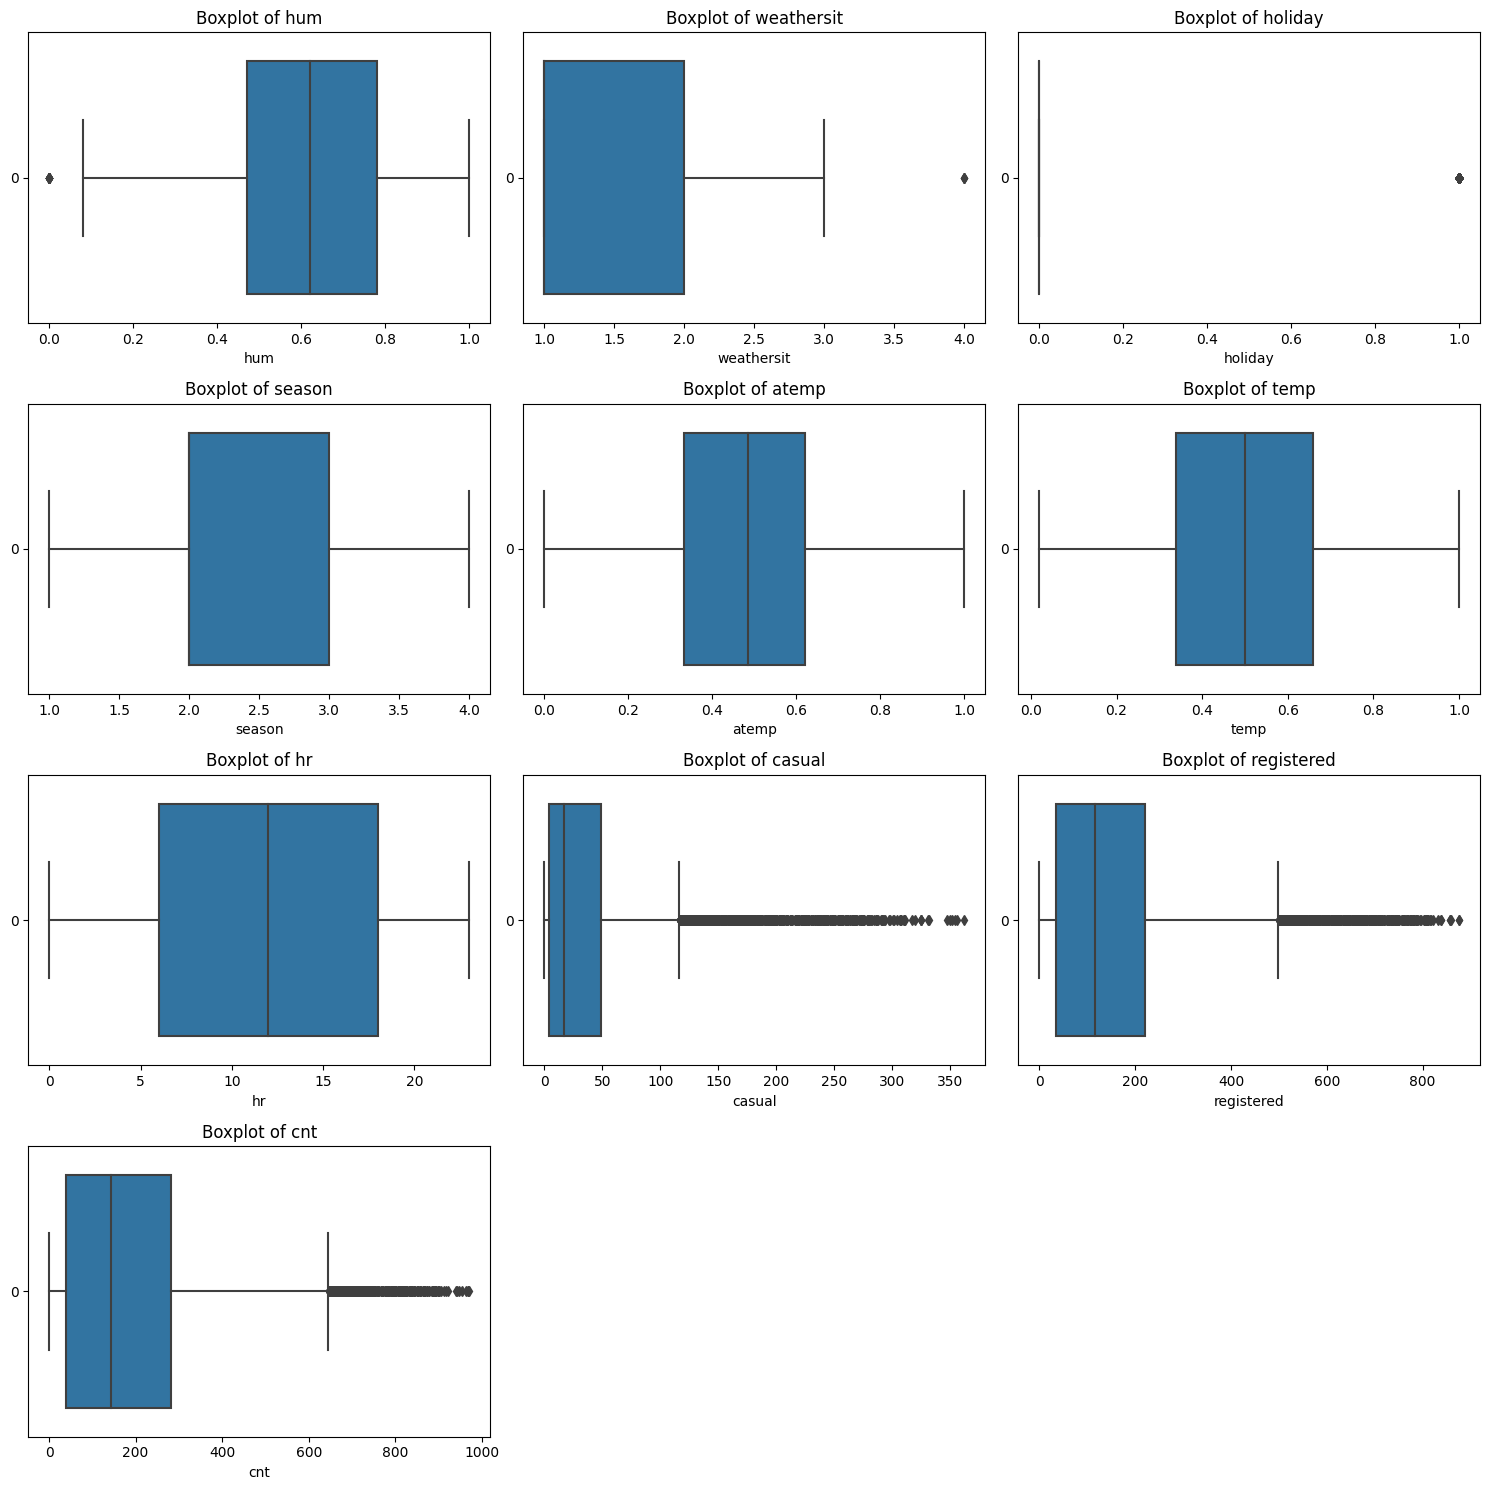

In [6]:
# Identify data distribution with boxplot

# Numerical columns
colNum = bs[[ 'hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp',
       'hr', 'casual', 'registered', 'cnt']]

# Plotting boxplot 
plt.figure(figsize=(15, 15))
for i, column in enumerate(colNum, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=bs[column], orient='horizontal')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

Based on boxplot data distribution above, that almost every columns have right skewed, its mean, that the skewed have positive outlier. Except 'hum' column, that is left skewed, it's mean that 'hum' column have negative outlier.

### **Exploratory Data Analyze**

#### **Count of Renters in Hours**

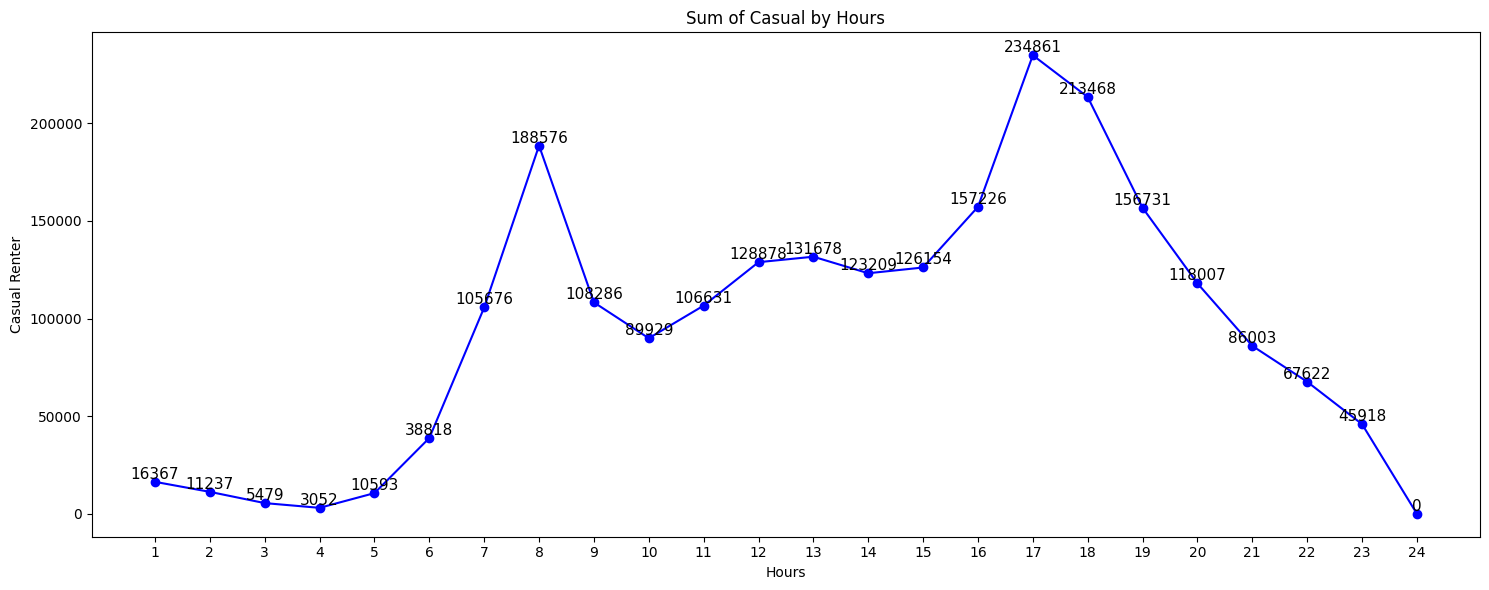

In [7]:
# Define hours category
hours_order = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

# Convertion of 'hr' column to be sequence categorical
bs['hr'] = pd.Categorical(bs['hr'], categories=hours_order, ordered=True)

# Frequence calculate column 'cnt' based on 'hr' column
count_by_hour = bs.groupby('hr')['cnt'].sum().loc[hours_order]

# Plot
plt.figure(figsize=(15, 6))
ax = count_by_hour.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.xlabel('Hours')
plt.ylabel('Casual Renter')
plt.title('Sum of Casual by Hours')
plt.xticks(range(len(hours_order)), hours_order)

# Label addition for count of 'cnt' column in every bar chart
for i, v in enumerate(count_by_hour):
    ax.text(i, v + 40, str(v), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

Based on line graph above, at 4.00 AM is the turning point for escalation graph, bike renter has increased untill **08.00 AM, which is the first peak hour** and then significantly down in a hour, and get up trend until 15.00 PM and back **increased again for second peak hour at 17.00 PM** and then, the graph straight down untill 24.00 PM. From the graph above, column 'hr' could be assumed discrete type because it have 2 peak point.

##### **Count of Renters in Season**

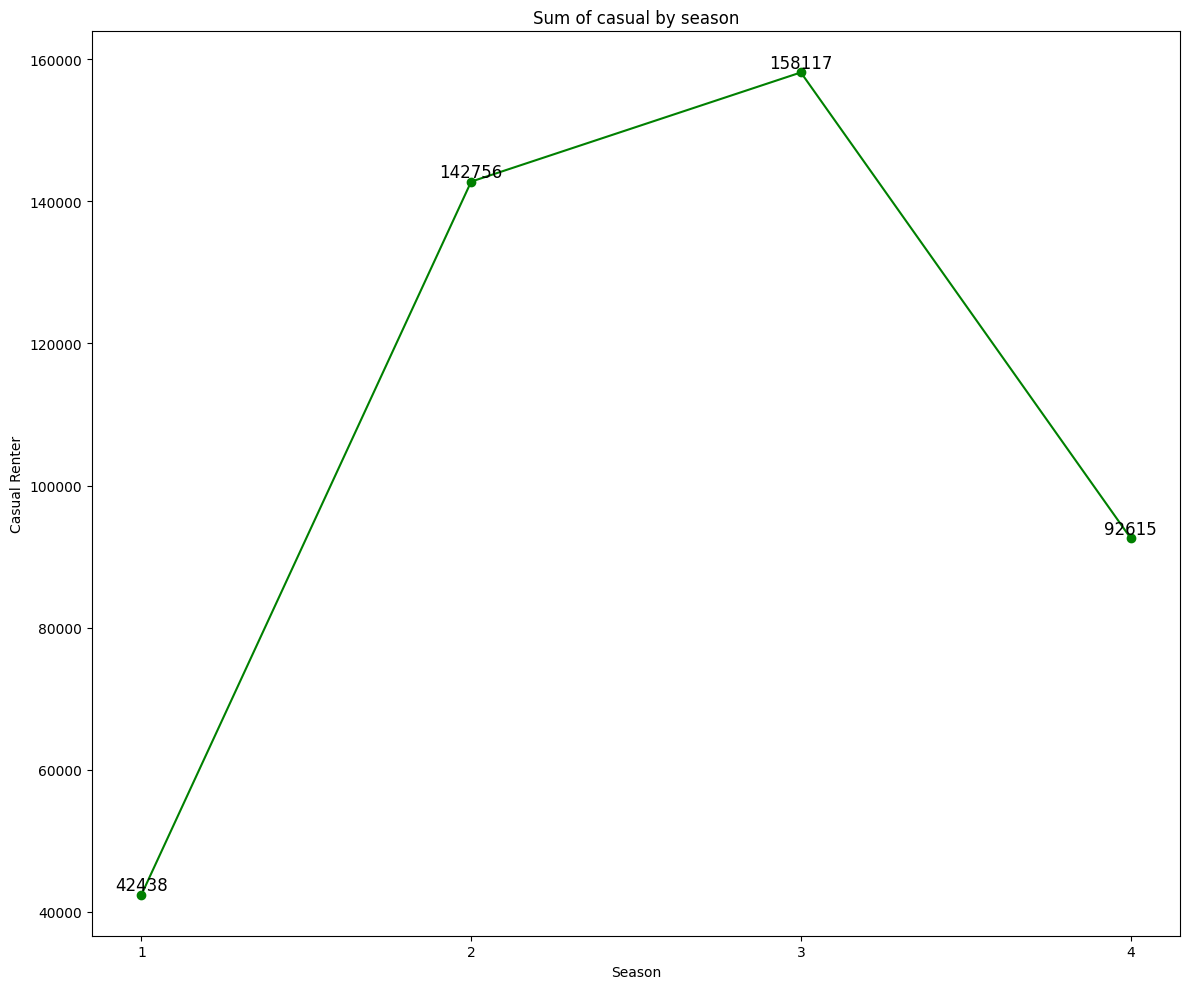

In [8]:
# Define season category
season_orders = [1,2,3,4]

# Convertion of 'season' column to be sequence categorical
bs['season'] = pd.Categorical(bs['season'], categories=season_orders, ordered=True)

# Frequence calculate column 'casual' based on 'season' column
count_by_season = bs.groupby('season')['casual'].sum().loc[season_orders]

# Plot
plt.figure(figsize=(12, 10))
ax = count_by_season.plot(kind='line', color='green', marker='o', linestyle='-')
plt.xlabel('Season')
plt.ylabel('Casual Renter')
plt.title('Sum of casual by season')
plt.xticks(range(len(season_orders)), season_orders)

# Label addition for count of 'casual' column in every bar chart
for i, v in enumerate(count_by_season):
    ax.text(i, v + 30, str(v), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

From line graph above, peak season for bike renters happened in summer.

##### **Count of Renters in Weather Condition**

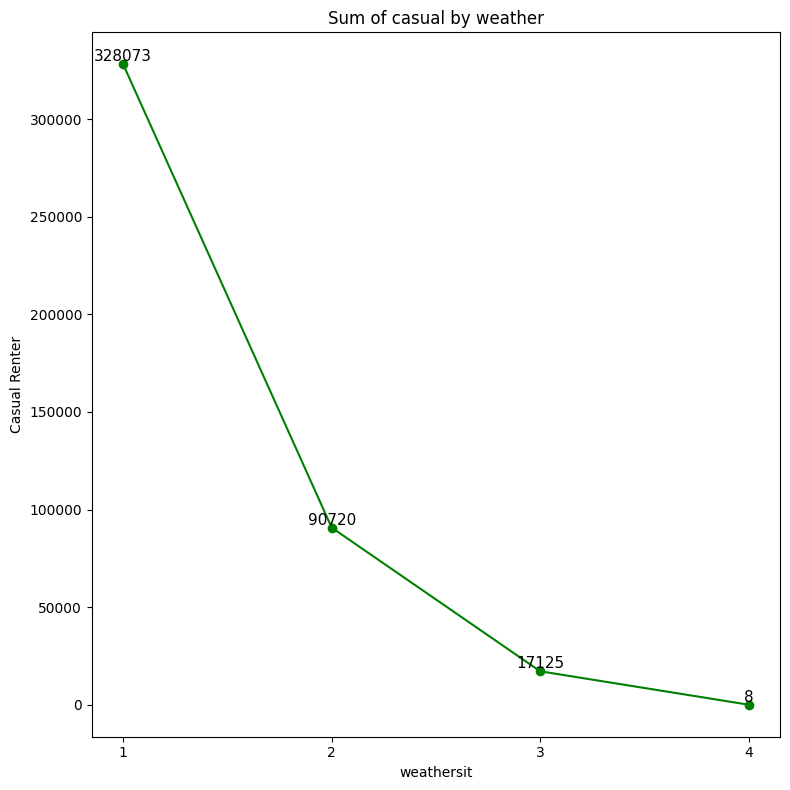

In [9]:
# Define weathe category
weather_orders = [1,2,3,4]

# Convertion of column 'weathersit' to be sequence categorical
bs['weathersit'] = pd.Categorical(bs['weathersit'], categories=weather_orders, ordered=True)

# Frequence calculate column 'casual' based on column 'weathersit'
count_by_weather = bs.groupby('weathersit')['casual'].sum().loc[weather_orders]

# Plot
plt.figure(figsize=(8, 8))
ax = count_by_weather.plot(kind='line', color='green', marker='o', linestyle='-')
plt.xlabel('weathersit')
plt.ylabel('Casual Renter')
plt.title('Sum of casual by weather')
plt.xticks(range(len(weather_orders)), weather_orders)

# Label addition for column 'casual' in every barchart
for i, v in enumerate(count_by_weather):
    ax.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

From line graph above, bike-sharing have high renters when weather was clear, and when weather get bad, renters get decreased.

#### **Spearman Correlation Matrix Toward Count of Renters**

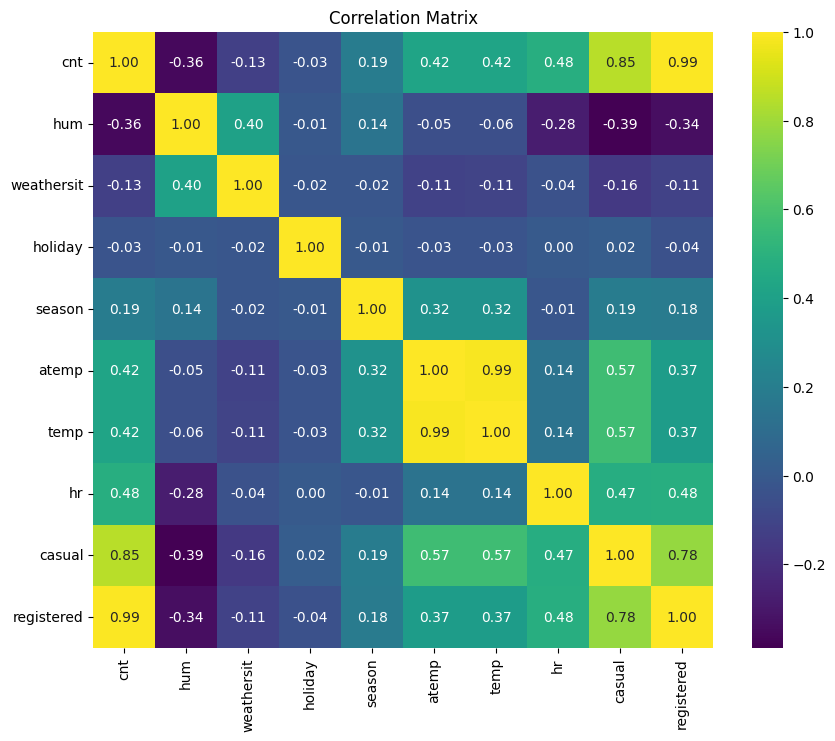

In [10]:
# Numercial column list toward 'cnt'
colNum = ['hum', 'weathersit', 'holiday', 'season', 'atemp', 'temp', 'hr', 'casual', 'registered']

# Calculate correlation metrix between column 'cnt' and numerical column
corr_matrix = bs[['cnt'] + colNum].corr(method='spearman')

# Setting Heatmap size
plt.figure(figsize=(10, 8))

# Create Heatmap correlation metrix
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', cbar=True)

# Display heatmap
plt.title('Correlation Matrix')
plt.show()


From correlation matrix above, we could find out what is most related column 'cnt' is from bottom to top heatmap at left heatmap. It could be reference for feature selection.

## **Data Preprocessing**

In this part will prepare the data for regression modeling, the point of preparation is :
- Data Cleaning, Feature Selection and Feature Engineering
    - Change 'dteday' column into date format
    - Extract day and month from date new column
    - Drop outlier
    - Correlation check after cleaning

For modeling feature, better use duplicate from origin data

In [2]:
# Duplicate dataset
bsMod = bs.copy()

### **Data Cleaning, Feature Selection, and Feature Engineering**

#### **Date format**

In [3]:
# Change format time
bsMod['dteday'] = pd.to_datetime(bs['dteday'])

#### **Extract day and month**

In [4]:
# Make day column
bsMod['day'] = bsMod['dteday'].dt.strftime('%A')

# Make daydate column
bsMod['daydate'] = bsMod['dteday'].dt.day

# Make month column
bsMod['month'] = bsMod['dteday'].dt.month

#### **Drop Outlier**

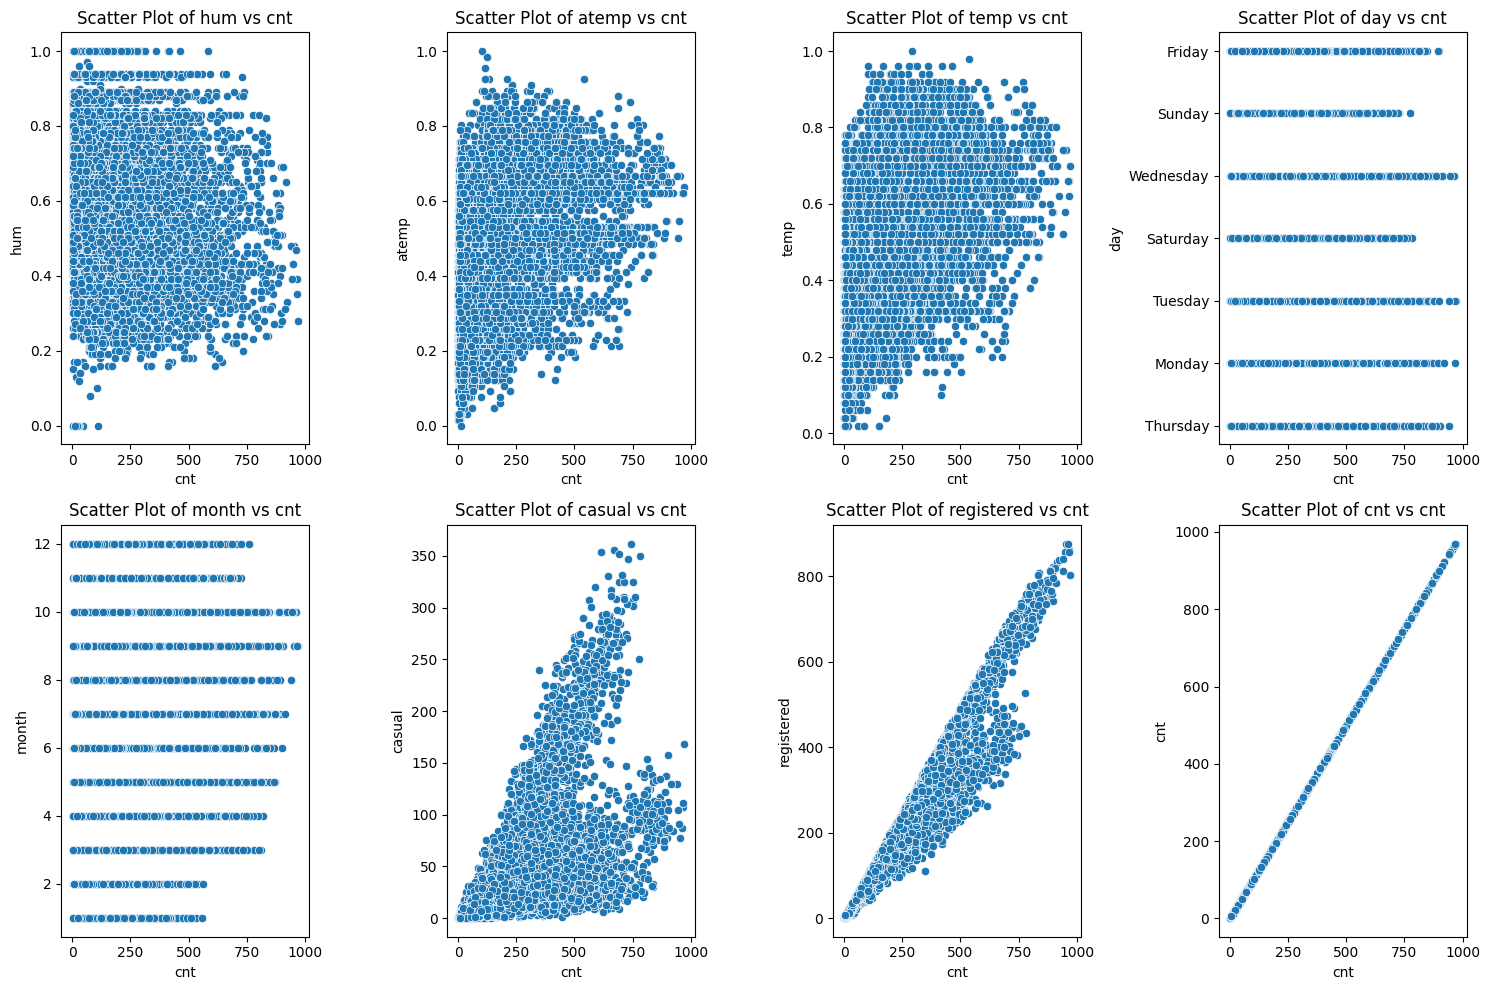

In [5]:
# Scatter plot for numerical columns
colNum = bsMod[['hum', 'atemp', 'temp', 'day', 'month', 'casual', 'registered', 'cnt']]

# Plotting scatter plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(colNum, 1):
    plt.subplot(2, 4, i)
    sns.scatterplot(data=bsMod, x='cnt', y=column)
    plt.title(f'Scatter Plot of {column} vs cnt')
    plt.xlabel('cnt')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


From the scatterplot above, it could assumed that :
-  0 'hum' looks outliers need to be drop because far from dominant
- over 0.9 in 'atemp' looks minority, but we need to see the upper bound for conclude if that outlier or not
- at column 'temp' looks better than 'atemp' eventhough the scatter so mess up
- at column 'day' and 'month' corroborates the assumption that it was categorical column and discrete number
- 'casual' and 'registered' column was part of 'cnt' column

In [6]:
# Identify lower bound and upper bound outliers
columns = ['hum', 'holiday', 'weathersit', 'atemp', 'temp',
       'hr', 'casual', 'registered', 'cnt']

def outliers(bsMod, column):
    Q1 = bsMod[column].quantile(0.25)
    Q3 = bsMod[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = bsMod[(bsMod[column] < lower_bound) | (bsMod[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Initial list for save data looping
outlier_data = []

for column in columns:
    outlier_result, lower_bound, upper_bound = outliers(bsMod, column)
    outlier_bsMod = len(outlier_result)
    outlier_percentage = round(outlier_bsMod / len(bsMod[column]) * 100, 2)
    outlier_data.append([column, outlier_bsMod, outlier_percentage, lower_bound, upper_bound])

# Create DataFrame
outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])

# Display DataFrame
outlier_df


Column  Total Outliers  Percentage (%)  Lower Bound  Upper Bound
0         hum              14            0.12      0.00500      1.24500
1     holiday             362            2.98      0.00000      0.00000
2  weathersit               3            0.02     -0.50000      3.50000
3       atemp               0            0.00     -0.09855      1.05305
4        temp               0            0.00     -0.14000      1.14000
5          hr               0            0.00    -12.00000     36.00000
6      casual             847            6.96    -63.50000    116.50000
7  registered             470            3.86   -245.00000    499.00000
8         cnt             338            2.78   -323.00000    645.00000

In [7]:
bsMod.query("holiday in [1]")[['holiday', 'day']].value_counts()

holiday  day      
1        Monday       253
         Friday        35
         Thursday      34
         Wednesday     22
         Tuesday       18
Name: count, dtype: int64

In [8]:
bsMod[bsMod['hum']<0.05]

dteday  hum  weathersit  holiday  season   atemp  temp  hr  casual  \
345   2011-03-10  0.0           3        0       1  0.3939  0.38   7       1   
871   2011-03-10  0.0           3        0       1  0.4394  0.44  15       3   
1645  2011-03-10  0.0           3        0       1  0.3182  0.34   0       3   
3239  2011-03-10  0.0           2        0       1  0.4394  0.44  17       2   
3717  2011-03-10  0.0           2        0       1  0.3333  0.34  22       4   
4924  2011-03-10  0.0           3        0       1  0.3333  0.36   6       0   
7285  2011-03-10  0.0           3        0       1  0.3182  0.34   1       0   
7760  2011-03-10  0.0           3        0       1  0.4242  0.42  12       4   
8412  2011-03-10  0.0           3        0       1  0.3939  0.38   8       1   
8960  2011-03-10  0.0           3        0       1  0.3485  0.34  23       1   
9186  2011-03-10  0.0           3        0       1  0.4091  0.40  11       6   
9651  2011-03-10  0.0           3        0       1  0.4091  0.40   9       1   
10715 2011-03-10  0.0           3        0       1  0.4242  0.42  16       1   
11766 2011-03-10  0.0           3        0       1  0.4242  0.42  13       1   

       registered  cnt       day  daydate  month  
345            36   37  Thursday       10      3  
871            11   14  Thursday       10      3  
1645            0    3  Thursday       10      3  
3239          109  111  Thursday       10      3  
3717           30   34  Thursday       10      3  
4924           12   12  Thursday       10      3  
7285            2    2  Thursday       10      3  
7760           30   34  Thursday       10      3  
8412           43   44  Thursday       10      3  
8960           26   27  Thursday       10      3  
9186            5   11  Thursday       10      3  
9651           23   24  Thursday       10      3  
10715          20   21  Thursday       10      3  
11766          11   12  Thursday       10      3

In [9]:
bsMod[bsMod['weathersit']>3]

dteday   hum  weathersit  holiday  season   atemp  temp  hr  casual  \
3208  2011-01-26  0.93           4        0       1  0.1970  0.22  16       1   
11386 2012-01-09  0.86           4        0       1  0.2273  0.20  18       6   
12079 2012-01-21  0.86           4        0       1  0.1364  0.14   1       1   

       registered  cnt        day  daydate  month  
3208           35   36  Wednesday       26      1  
11386         158  164     Monday        9      1  
12079          22   23   Saturday       21      1

In [10]:
bsMod[bsMod['weathersit']>=3]

dteday   hum  weathersit  holiday  season   atemp  temp  hr  casual  \
19    2012-07-09  0.83           3        0       3  0.6061  0.66   7       7   
39    2011-03-31  0.93           3        0       2  0.2273  0.24   3       0   
47    2012-05-14  0.88           3        0       2  0.5152  0.54   8       1   
63    2011-10-19  0.88           3        0       4  0.5000  0.52  10      14   
82    2011-04-22  0.87           3        0       2  0.3030  0.32  20       8   
...          ...   ...         ...      ...     ...     ...   ...  ..     ...   
12127 2012-03-13  0.72           3        0       1  0.5000  0.52   3       0   
12129 2012-05-08  0.73           3        0       2  0.6061  0.64  16      54   
12133 2012-10-02  0.94           3        0       4  0.5455  0.58  11       7   
12136 2011-02-05  1.00           3        0       1  0.2273  0.22  16       8   
12142 2011-03-23  0.82           3        0       2  0.3939  0.38  18      20   

       registered  cnt        day  daydate  month  
19            223  230     Monday        9      7  
39              1    1   Thursday       31      3  
47            155  156     Monday       14      5  
63            109  123  Wednesday       19     10  
82             39   47     Friday       22      4  
...           ...  ...        ...      ...    ...  
12127           2    2    Tuesday       13      3  
12129         335  389    Tuesday        8      5  
12133          92   99    Tuesday        2     10  
12136          63   71   Saturday        5      2  
12142         218  238  Wednesday       23      3  

[975 rows x 14 columns]

From scatterplot before and combine with table above, we could concluded :
- 'hum' column there was 14 outliers under lower bound, that means the humidity is 0, it was not make sense based on similarity humidity in the same hour, so, the outlier will change into 'hum' mean. Mean selected because there is no extreme outlier in 'hum' column, so, mean is the best choice for center.
- 'holiday' column have 362 outlier over upper bound, based on CNN News, United State only recognized 10 day in a year for holiday, so, the outliers assumed wrong data.
- 'weathersit' column have 3 outlier over upper bound, and the outlier has clueless. Because 'weathersit' column have a bit outlier, so, left as it is.

In [11]:
# Outliers treatment
bsMod['hum'] = bsMod['hum'].apply(lambda x: bsMod['hum'].mean() if x < 0.05 else x)
bsMod['holiday'].replace(1, 0, inplace=True)


#### **Correlation check after data cleaning**

In [10]:
from scipy.stats import spearmanr

# Numerical column for feature data
colNum = ['hum', 'atemp', 'temp', 'weathersit', 'season', 'hr', 'day', 'daydate', 'month']

# List for saving correlation test result
results = []

# Loop the Numerical column
for column in colNum:
    # Spearman correlation test
    correlation, p_value = spearmanr(bsMod['cnt'], bsMod[column])
    
    # Added the result to the list
    results.append({'Variable': column, 'Spearman_Correlation': correlation, 'P-Value': p_value})

# Create result data frame
correlation_table = pd.DataFrame(results)

# Display the result
correlation_table

Variable  Spearman_Correlation       P-Value
0         hum             -0.359697  0.000000e+00
1       atemp              0.422224  0.000000e+00
2        temp              0.421771  0.000000e+00
3  weathersit             -0.127065  5.787236e-45
4      season              0.188724  6.263880e-98
5          hr              0.513555  0.000000e+00
6         day             -0.020335  2.490795e-02
7     daydate             -0.005704  5.292769e-01
8       month              0.127772  1.888736e-45

From the correlation table with Spearman method, we could see the high correlation and low correlation. It used to references for feature selection.

#### **Encoding**

Before start analyze, we have to encode the feature according to assumption we create.

In [14]:
# Library for encoding
import category_encoders as ce 
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [15]:
    transformer = ColumnTransformer([
        ('Binary',ce.BinaryEncoder(),['month', 'day', 'daydate', 'hr']),
        ('OHE',OneHotEncoder(drop='first'),['holiday', 'season'])
    ],remainder='passthrough')

    transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Binary', BinaryEncoder(),
                                 ['month', 'day', 'daydate', 'hr']),
                                ('OHE', OneHotEncoder(drop='first'),
                                 ['holiday', 'season'])])

For encoding data, the code above using binary and one hot encoder, which mean :
- **Binary Encoder** is one of the encoding techniques in categorical data processing. It converts categorical values into a binary representation, which replaces the categorical value with a series of 0 and 1 bits. Each bit represents one category, and a variety of combinations of these bits are used to encode the category of data. This technique is useful when you have categorical features with many unique categories and want to convert them into a format that can be used by machine learning models. Binary Encoder is one way to solve this problem by reducing the dimensionality of the data and retaining the important information.
- **One-Hot Encoder** is one of the techniques in categorical data processing used to convert categorical variables into a form that can be understood by machine learning models. This technique works by converting each category value into a binary vector of equal length. Each binary vector represents one category, and only one element in the vector is 1 (hot), while the other element is 0 (cold).

## **Analytics**

From Data Preprocessing we could start analytic for modeling the machine learning

### **Train Test Split**

In [16]:
# Library for spliting data

from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV, GridSearchCV, KFold

In [17]:
# Define feature (x) and the target prediction (y)

x = bsMod.drop(['cnt', 'registered', 'casual', 'dteday', 'atemp'],axis=1)
y = bsMod['cnt']

xtrain,xtest,ytrain,ytest = train_test_split(
    x,
    y,
    test_size=0.2, # Splitting test size with 20% for data test and 80% for data train
    random_state=6191
)

x

hum  weathersit  holiday  season  temp  hr        day  daydate  month
0      0.62           1        0       4  0.36  16     Friday        9     12
1      0.64           1        0       2  0.54   4     Sunday       17      6
2      0.53           1        0       2  0.62  23  Wednesday       15      6
3      0.87           2        0       2  0.36   8   Saturday       31      3
4      0.55           1        0       3  0.76  18    Tuesday       31      7
...     ...         ...      ...     ...   ...  ..        ...      ...    ...
12160  0.75           1        0       1  0.24   7  Wednesday       25      1
12161  0.62           1        0       3  0.78   0     Friday        6      7
12162  0.60           2        0       1  0.24   5     Monday       20      2
12163  0.77           2        0       2  0.42   2   Saturday       31      3
12164  0.47           1        0       2  0.64  18   Thursday       28      4

[12165 rows x 9 columns]

The table contains all feature, except :
- 'cnt' column, because that is the targe prediction.
- 'registered' and 'casual' column, that is part of 'cnt' column, whereas the 'registered' plus 'casual' equal 'cnt'
- 'dteday' column, that is datetime series type, the machine learning regression cannot proceed that, and in part feature engineering, the 'dteday' was split into 'day' 'daydate', 'month'.
- 'atemp' column have similarity with 'temp' column, because the 'temp' column have a lilttle bit bigger correlation test than 'atemp', so, 'temp' could be choosen.

### **Model Benchmark**

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

Models definition :
- **Linear regression** is a supervised machine learning algorithm used for modeling and predicting a continuous target variable based on one or more input features or independent variables. It establishes a linear relationship between the input features and the target variable.
- **K-Neighbors Regressor** is employed to predict a continuous target variable rather than a categorical one. It operates on the principle of finding the k-nearest data points (neighbors) in the training dataset to make predictions for the target variable.
- **Decision Tree Regressor**, It's a tree-like structure where an internal node represents a feature or attribute, each branch represents a decision rule, and each leaf node represents an outcome (a class label or a value). Decision Trees are used for decision support, making decisions by following the tree from the root to a leaf based on the input features.
- **Random Forest Regressor** is an ensemble learning technique that builds a collection of decision trees during training and combines their predictions to make accurate numerical predictions. It is particularly useful when dealing with complex, nonlinear relationships between input features and the target variable. The method can handle noisy data and prevent overfitting by aggregating the results from multiple decision trees.
- **EXtreme Gradient Boost** for regression is a supervised learning algorithm that leverages the gradient boosting framework to predict continuous numerical values as the output variable. It is designed to optimize predictive performance by combining the predictions of multiple weak models, typically decision trees. XGBoost has become a popular choice in regression tasks due to its speed, scalability, and robustness.
- **Light Gradient Boost Regressor** is developed from decision tree, but it have different with other. LightGBM uses a "leaf-wise" growth strategy, which means the decision tree will be expanded at the leaf that provides the greatest loss reduction. This allows the model to become more complex and accurate in predicting the target.
- **CatBoost (Categorical Boost**) is developed from decision tree, but it was effectively handles categorical data without the need for conversion to numbers. This is a feature that sets CatBoost apart from many other machine learning algorithms
- **SVR or Support Vector Kernel** uses the kernel concept to transform the input data into a higher dimensional space. This helps in finding complex relationships between input variables and target variables.
- **Gradient Boost**, is the ensemble learning algorithm developed from decision tree, uses optimisation methods such as gradient descent to optimise the model. Each model seeks to reduce the error measured by the gradient of the objective function (usually the mean square error in the case of regression).
- **Ada Boost or Adaptive Boosting** is the ensemble learning too, developed from decision tree, AdaBoost assigns different weights to each training data. Data that was misclassified by the previous model is given more weight, so that the next model focuses more on data that is difficult to predict.

In [21]:
# Model to be used
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2198)
rf = RandomForestRegressor(random_state=2198)
xgb = XGBRegressor(random_state=2198)
svr = SVR(kernel='rbf', C=10, epsilon=0.2)
lgbm = LGBMRegressor(random_state=2198)
cb = CatBoostRegressor(iterations=800, learning_rate=0.1, depth=6, random_seed=2198)
gb = GradientBoostingRegressor(random_state=2198)
ab = AdaBoostRegressor(random_state=2198)

models = [lr, knn, dt, rf, xgb, svr, lgbm, cb, gb, ab]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for i in models:
    crossval = KFold(n_splits=8, shuffle=True, random_state=2198)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
    )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
    )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
    )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-140.78189112 -148.32730997 -152.34086667 -147.21102646 -143.70491214
 -150.24620939 -136.83963163 -146.17416353] LinearRegression()
[-105.9205764  -108.74531302 -111.78462839 -107.87959898 -108.129378
 -109.24366789 -103.29378158 -105.34288468] LinearRegression()
[-3.11070824 -3.3282561  -3.24570265 -2.61700581 -3.26703536 -3.38893515
 -3.66066869 -2.91300864] LinearRegression()
[ -92.02274218 -103.27308248 -108.03917151 -102.6615401  -103.30134587
 -104.79726355  -99.36297792 -104.71092617] KNeighborsRegressor()
[-61.52654067 -68.76285949 -70.73656532 -68.87329499 -69.26792763
 -68.24572368 -65.24342105 -68.84786184] KNeighborsRegressor()
[-0.84818354 -0.90188942 -0.97234211 -0.81104972 -0.86498874 -0.86676469
 -0.94343713 -0.92149647] KNeighborsRegressor()
[ -93.2738522   -98.06163691 -107.42053683 -101.5415487   -93.6561021
 -101.48604308  -95.40615653 -100.74943679] DecisionTreeRegressor(random_state=2198)
[-56.25965489 -60.45932621 -64.87099425 -63.24815119 -58.75328947
 -62.321

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Membuat list dari model
model_names = ['Linear Regression', 
               'KNN Regressor', 
               'DecisionTree Regressor', 
               'RandomForest Regressor', 
               'XGBoost Regressor', 
               'Support Vector Regression', 
               'Light Gradient Boost Regressor', 
               'CatBoost Regressor', 
               'Gradient Boost Regressor', 
               'Ada Boost Regressor']

# Menggabungkan hasil evaluasi menjadi satu DataFrame
results_df = pd.DataFrame({
    'Model': model_names,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

# Menampilkan DataFrame
results_df

Model   Mean_RMSE  Std_RMSE    Mean_MAE   Std_MAE  \
0               Linear Regression -145.703251  4.754657 -107.542479  2.457514   
1                   KNN Regressor -102.271131  4.490389  -67.688024  2.737381   
2          DecisionTree Regressor  -98.949414  4.496215  -60.906781  2.687620   
3          RandomForest Regressor  -71.714489  2.557683  -46.850686  1.406986   
4               XGBoost Regressor  -64.741772  1.918635  -43.629646  1.309420   
5       Support Vector Regression -143.657242  6.606865  -94.213534  3.613543   
6  Light Gradient Boost Regressor  -68.582144  2.560887  -45.772877  1.296437   
7              CatBoost Regressor  -63.852610  2.361406  -43.279362  1.372402   
8        Gradient Boost Regressor  -96.450010  2.690340  -65.540183  1.599199   
9             Ada Boost Regressor -118.189347  2.619046  -91.653107  4.426573   

   Mean_MAPE  Std_MAPE  
0  -3.191415  0.295925  
1  -0.891269  0.049879  
2  -0.562179  0.051084  
3  -0.474850  0.035540  
4  -0.679972  0.069145  
5  -1.749015  0.121230  
6  -0.575791  0.061069  
7  -0.706981  0.070140  
8  -1.017911  0.093090  
9  -2.266547  0.466860

From the result above, 'Random Forest Regressor' have smaller error than the others with MAPE 47.48%, the smaller model categorized big error, it is because the target data have long range data, range target start from 1 and the maximum is 970. In this case, every regression models will difficult to well proceed, this case could be get logarithmic treat with **TransformedTargetRegressor** for minimised the target range. The logarithmic treat is adding function log1p which mean log+1 for every data target, and then return the function with expm1 which mean exponential min 1.

In [24]:
log_lr = TransformedTargetRegressor(lr, func=np.log1p, inverse_func=np.expm1, check_inverse=False)
log_knn = TransformedTargetRegressor(knn, func=np.log1p, inverse_func=np.expm1, check_inverse=False)
log_dt = TransformedTargetRegressor(dt, func=np.log1p, inverse_func=np.expm1, check_inverse=False)
log_rf = TransformedTargetRegressor(rf, func=np.log1p, inverse_func=np.expm1, check_inverse=False)
log_xgb = TransformedTargetRegressor(xgb, func=np.log1p, inverse_func=np.expm1, check_inverse=False)
log_lgbm = TransformedTargetRegressor(lgbm, func=np.log1p, inverse_func=np.expm1, check_inverse=False)
log_cb = TransformedTargetRegressor(cb, func=np.log1p, inverse_func=np.expm1, check_inverse=False)
log_gb = TransformedTargetRegressor(gb, func=np.log1p, inverse_func=np.expm1, check_inverse=False)
log_ab = TransformedTargetRegressor(ab, func=np.log1p, inverse_func=np.expm1, check_inverse=False)


logmodels = [log_lr, log_knn, log_dt, log_rf, log_xgb, log_lgbm, log_cb, log_gb, log_ab]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for i in logmodels:
    
    crossval = KFold(n_splits=8, shuffle=True, random_state=2198)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])
    
    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        xtrain, 
        ytrain, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

    # Membuat list dari model
logmodel_names = ['Log Linear Regression', 
               'Log KNN Regressor', 
               'Log DecisionTree Regressor', 
               'Log RandomForest Regressor', 
               'Log XGBoost Regressor',  
               'Log Light Gradient Boost Regressor', 
               'Log CatBoost Regressor', 
               'Log Gradient Boost Regressor', 
               'Log Ada Boost Regressor']


# Menggabungkan hasil evaluasi menjadi satu DataFrame
results_df = pd.DataFrame({
    'Model': logmodel_names,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

# Menampilkan DataFrame
results_df

[-159.0742854  -164.56268115 -169.41777897 -168.30993863 -159.98820193
 -168.4131483  -151.40136836 -164.53825162] TransformedTargetRegressor(check_inverse=False, func=<ufunc 'log1p'>,
                           inverse_func=<ufunc 'expm1'>,
                           regressor=LinearRegression())
[-106.58713747 -108.59056366 -111.16030108 -113.23365323 -108.4961439
 -110.15440077 -102.29630752 -108.63880899] TransformedTargetRegressor(check_inverse=False, func=<ufunc 'log1p'>,
                           inverse_func=<ufunc 'expm1'>,
                           regressor=LinearRegression())
[-1.41693205 -1.53793613 -1.48385259 -1.30589066 -1.50476622 -1.48907677
 -1.59602307 -1.35712611] TransformedTargetRegressor(check_inverse=False, func=<ufunc 'log1p'>,
                           inverse_func=<ufunc 'expm1'>,
                           regressor=LinearRegression())
[ -94.83092338 -106.97974271 -111.15174792 -106.23835674 -106.58788513
 -110.65797003 -100.36851027 -108.98236321] Trans

Model   Mean_RMSE  Std_RMSE    Mean_MAE  \
0               Log Linear Regression -163.213207  5.724295 -108.644665   
1                   Log KNN Regressor -105.724687  5.176263  -66.264695   
2          Log DecisionTree Regressor  -98.323523  3.937228  -60.455620   
3          Log RandomForest Regressor  -73.085697  3.670257  -45.854464   
4               Log XGBoost Regressor  -64.982740  3.740731  -40.399701   
5  Log Light Gradient Boost Regressor  -72.135343  2.947787  -45.510606   
6              Log CatBoost Regressor  -62.292128  3.031866  -39.338440   
7        Log Gradient Boost Regressor -102.231266  4.669064  -63.418849   
8             Log Ada Boost Regressor -138.768613  6.123123  -84.658440   

    Std_MAE  Mean_MAPE  Std_MAPE  
0  3.046035  -1.461450  0.089558  
1  2.831680  -0.624333  0.020558  
2  2.085267  -0.540889  0.020364  
3  1.713260  -0.381621  0.021178  
4  2.041068  -0.328365  0.014964  
5  1.491640  -0.354563  0.019772  
6  1.554367  -0.315141  0.016213  
7  2.094432  -0.527822  0.031686  
8  3.030835  -0.689186  0.029748

After used **TransformedTargetRegressor** to the target, the models result got improved at MAPE score. <br>
But the better least error shift to :
- CatBoost Regressor with error percentage 31.51%
- Xtreme Gradient Boost Regressor with error percentage 32.83%


### **Predict to Test Set Before Tuning**

In [29]:
# Benchmark 2 best models
models = {
    'LogXGB': log_xgb,
    'LogCatboost': log_cb
}

score_rmse = []
score_mae = []
score_mape = []

# Predict to data test
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    score_rmse.append(np.sqrt(mean_squared_error(ytest, y_pred)))
    score_mae.append(mean_absolute_error(ytest, y_pred))
    score_mape.append(mean_absolute_percentage_error(ytest, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

0:	learn: 1.3213627	total: 2.24ms	remaining: 1.79s
1:	learn: 1.2329136	total: 4.96ms	remaining: 1.98s
2:	learn: 1.1565625	total: 7.41ms	remaining: 1.97s
3:	learn: 1.0893660	total: 9.65ms	remaining: 1.92s
4:	learn: 1.0333569	total: 12ms	remaining: 1.91s
5:	learn: 0.9838395	total: 13.7ms	remaining: 1.81s
6:	learn: 0.9445300	total: 15ms	remaining: 1.7s
7:	learn: 0.9041012	total: 17.3ms	remaining: 1.71s
8:	learn: 0.8707703	total: 19.7ms	remaining: 1.74s
9:	learn: 0.8315222	total: 22.3ms	remaining: 1.76s
10:	learn: 0.8066064	total: 24.6ms	remaining: 1.76s
11:	learn: 0.7776669	total: 26.7ms	remaining: 1.75s
12:	learn: 0.7534192	total: 29ms	remaining: 1.76s
13:	learn: 0.7309643	total: 31.2ms	remaining: 1.75s
14:	learn: 0.7148610	total: 33.1ms	remaining: 1.73s
15:	learn: 0.6998331	total: 35ms	remaining: 1.72s
16:	learn: 0.6860836	total: 37ms	remaining: 1.71s
17:	learn: 0.6756386	total: 39.6ms	remaining: 1.72s
18:	learn: 0.6643818	total: 41.9ms	remaining: 1.72s
19:	learn: 0.6413347	total: 43.9m

RMSE        MAE      MAPE
LogXGB       63.689701  39.941406  0.329134
LogCatboost  62.138167  39.420712  0.321758

When the best models got predict into test data, the error got increase for Catboost and decrease for XGboost, but the number in the same number at the first two digits. Then start for HyperParameter Tuning.

### **Hyper Parameter Tuning**

In Hyperparameter Tuning the method divide by two :
- **GridSearchCV** (Grid Search Cross-Validation): <br>
GridSearchCV is the most commonly used hyperparameter search method. It tries all possible hyperparameter combinations from a set of predefined hyperparameters. GridSearchCV performs cross-validation for each hyperparameter combination and selects the combination that gives the best results. <br>
**Advantages**: GridSearchCV guarantees you will evaluate every possible hyperparameter combination, so you will not miss the best combination. This is suitable for cases where you have enough computing resources to test all combinations. <br>
**Disadvantage**: GridSearchCV can be very computationally expensive, especially if you have many hyperparameters or a high selection. It is also less efficient if only a few combinations have good performance.

- **RandomisedSearchCV** (Randomised Search Cross-Validation): <br>
RandomisedSearchCV is an alternative method for hyperparameter search. It takes a more randomised approach by randomly selecting hyperparameter combinations from the hyperparameter search space. You specify the number of iterations (combinations to be tested) rather than testing all combinations as in GridSearchCV. <br>
**Advantages**: RandomisedSearchCV is more computationally efficient because you can limit the number of iterations. This is suitable for cases where you have limited computing resources. It also has a chance of finding good combinations with fewer iterations. <br>
**Disadvantage**: You have no guarantee that you will evaluate all hyperparameter combinations, so you might miss a perfect combination. It is more suitable for initial exploration of hyperparameters rather than a very deep search.

Because the limited computing, in this models would used **RandomisedSearchCV**

#### **X Gradient Boost Tuning**

For tuning XGBoost we used :
- Max Depth:
max_depth is a hyperparameter that controls the maximum depth of the decision tree in the XGBoost model. The larger the max_depth value, the deeper the decision tree, which can allow the model to understand more complicated relationships in the training data.
    - Effect: A max_depth value that is too large can lead to overfitting, where the model learns small details in the training data that are not common. A max_depth value that is too small can lead to underfitting, where the model may fail to understand patterns in the training data.
- Learning Rate:
learning_rate (also known as "eta") is a hyperparameter that controls how much of a learning step the model takes each time in the learning process. It is the factor used to adjust the weights of the tree at each iteration.
    - Effect: A learning rate that is too large can lead to model overfitting or even missing the global minimum, while a learning rate that is too small will slow down the convergence of the model.
- N_estimators (Number of Estimators):
n_estimators is a hyperparameter that controls the number of trees (estimators) to be built in the XGBoost model. Each tree is a step in the learning process, and n_estimators sets the number of times the learning process will run.
    - Effect: A larger number of estimators will improve the model's ability to understand the training data. However, choosing a very large value may cause overfitting and increase the computational cost.

In [30]:
# XGBoost Parameter Tuning
ParamXGB = {
    'model__regressor__max_depth': list(np.arange(1, 8)),
    'model__regressor__learning_rate': list(np.arange(1, 80)/100),
    'model__regressor__n_estimators': list(np.arange(100, 171))
}

# Pipeline
pipeXGB = Pipeline([
    ('Preprocess', transformer),
    ('model', log_xgb)
])

# Hyper Parameter Tuning
randomSearchXGB = RandomizedSearchCV(
    estimator=pipeXGB,
    param_distributions=ParamXGB,
    cv=crossval,
    scoring={
        'MAPE': 'neg_mean_absolute_percentage_error',
        'RMSE': 'neg_root_mean_squared_error',
        'R^2': 'r2'
    },
    refit='MAPE',
    n_iter=10,  # Adjust the number of iterations
    random_state=42  # Set a random seed for reproducibility
)

In [31]:
# Fit ke data train
randomSearchXGB.fit(xtrain, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=8, random_state=2198, shuffle=True),
                   estimator=Pipeline(steps=[('Preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Binary',
                                                                               BinaryEncoder(),
                                                                               ['month',
                                                                                'day',
                                                                                'daydate',
                                                                                'hr']),
                                                                              ('OHE',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['holiday',
                                                                                'season'])])),
                                             ('model',
                                              TransformedTargetRegressor(check_inverse=False,
                                                                         func=<ufu...
                                                                            0.29,
                                                                            0.3, ...],
                                        'model__regressor__max_depth': [1, 2, 3,
                                                                        4, 5, 6,
                                                                        7],
                                        'model__regressor__n_estimators': [100,
                                                                           101,
                                                                           102,
                                                                           103,
                                                                           104,
                                                                           105,
                                                                           106,
                                                                           107,
                                                                           108,
                                                                           109,
                                                                           110,
                                                                           111,
                                                                           112,
                                                                           113,
                                                                           114,
                                                                           115,
                                                                           116,
                                                                           117,
                                                                           118,
                                                                           119,
                                                                           120,
                                                                           121,
                                                                           122,
                                                                           123,
                                                                           124,
                                                                           125,
                                                                           126,
                                                       

In [32]:
# Print the best hyperparameters and performance metrics
print("Best hyperparameters:", randomSearchXGB.best_params_)
print("Best MAPE:", -randomSearchXGB.best_score_)  # Convert negative MAPE back to positive
print("Best RMSE:", -randomSearchXGB.cv_results_['mean_test_RMSE'][randomSearchXGB.best_index_])
print("Best R^2:", randomSearchXGB.cv_results_['mean_test_R^2'][randomSearchXGB.best_index_])

Best hyperparameters: {'model__regressor__n_estimators': 123, 'model__regressor__max_depth': 7, 'model__regressor__learning_rate': 0.34}
Best MAPE: 0.31852070221791623
Best RMSE: 60.97924882002095
Best R^2: 0.8844125302200749


From the result above, the **XGBoost** get improvement in **MAPE from 32.83% to 31.85%**

#### **Predict to Test Set with XGBoost Tuned Models**

In [73]:
# Model define toward best estimator
xgb_tuning = randomSearchXGB.best_estimator_

# Fitting model
xgb_tuning.fit(xtrain, ytrain)

# Predict to test set
y_pred_xgb_tuning = xgb_tuning.predict(xtest)

# Save value of metrics RMSE, R Squared & MAPE after tuned
rmse_xgb_tuning = np.sqrt(mean_squared_error(ytest, y_pred_xgb_tuning))
r2_xgb_tuning = r2_score(ytest, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(ytest, y_pred_xgb_tuning)
mae_xgb_tuning = mean_absolute_error(ytest, y_pred_xgb_tuning)

# Create a DataFrame to store the metrics
score_after_tuning_xgb = pd.DataFrame({'RMSE': [rmse_xgb_tuning], 'R Squared': [r2_xgb_tuning], 'MAPE': [mape_xgb_tuning], 'MAE': [mae_xgb_tuning]})

# Display the DataFrame
score_after_tuning_xgb

RMSE  R Squared      MAPE        MAE
0  60.778567    0.89433  0.314493  36.753987

#### **CatBoost Tuning**

For Catboost tuning we used :
 - **Iterations** : This refers to the number of iterations (weight updates) performed by the algorithm. The more iterations, the more complex your model becomes, which can affect performance and the model's propensity for overfitting. The optimal number of iterations will vary depending on the dataset and the problem at hand, but this is an important hyperparameter to tune.

 - **Learning Rate** : The learning rate controls the extent to which the model weights are updated during each iteration. A smaller learning rate leads to slower learning but can be more stable. Conversely, a larger learning rate can lead to faster convergence, but can cause the model to overshoot. This is an important hyperparameter that needs to be tuned.

 - **Depth** : Depth refers to how far the decision tree in the CatBoost algorithm will grow. The deeper the tree, the more complex the model. A deep tree depth can help the model capture more complex relationships in the data, but it also increases the risk of overfitting. Tree depth is a hyperparameter that needs to be considered.

 - **L2 Leaf Regularization (l2_leaf_reg)** : This is a hyperparameter that controls the L2 regularization (L2 penalisation) applied to leaf values in the decision tree. This regularisation helps prevent overfitting. Higher values of l2_leaf_reg provide more regularisation, while lower values provide less regularisation.

In [38]:
# Catboost Parameter Tuning
param_CB = {
    'model__regressor__iterations': [800, 1000, 1200],
    'model__regressor__learning_rate': [0.05, 0.1, 0.2],
    'model__regressor__depth': [4, 6, 8],
    'model__regressor__l2_leaf_reg': [1, 3, 5]
}

# Pipeline
pipeCB = Pipeline([
    ('Preprocess', transformer),
    ('model', log_cb)
])

# Hyper Parameter Tuning
randomSearchCB = RandomizedSearchCV(
    estimator=pipeCB,
    param_distributions=param_CB,
    cv=crossval,
    scoring={
        'MAPE': 'neg_mean_absolute_percentage_error',
        'RMSE': 'neg_root_mean_squared_error',
        'R^2': 'r2'
    },
    refit='MAPE',
    n_iter=10,  # Adjust the number of iterations
    random_state=42  # Set a random seed for reproducibility
)

In [39]:
# Fit ke data train
randomSearchCB.fit(xtrain, ytrain)

0:	learn: 1.3676487	total: 1.96ms	remaining: 1.56s
1:	learn: 1.3200831	total: 4.27ms	remaining: 1.7s
2:	learn: 1.2793581	total: 6.13ms	remaining: 1.63s
3:	learn: 1.2392081	total: 8.21ms	remaining: 1.63s
4:	learn: 1.2016020	total: 10.4ms	remaining: 1.65s
5:	learn: 1.1652977	total: 12.4ms	remaining: 1.64s
6:	learn: 1.1351438	total: 14ms	remaining: 1.58s
7:	learn: 1.1021996	total: 16ms	remaining: 1.58s
8:	learn: 1.0730656	total: 17.9ms	remaining: 1.57s
9:	learn: 1.0418448	total: 19.8ms	remaining: 1.57s
10:	learn: 1.0162250	total: 21.8ms	remaining: 1.56s
11:	learn: 0.9925775	total: 24.6ms	remaining: 1.61s
12:	learn: 0.9689468	total: 27.4ms	remaining: 1.66s
13:	learn: 0.9455025	total: 29.4ms	remaining: 1.65s
14:	learn: 0.9234299	total: 32ms	remaining: 1.68s
15:	learn: 0.9032975	total: 35.1ms	remaining: 1.72s
16:	learn: 0.8855004	total: 38.5ms	remaining: 1.77s
17:	learn: 0.8688050	total: 41.2ms	remaining: 1.79s
18:	learn: 0.8530554	total: 43.6ms	remaining: 1.79s
19:	learn: 0.8391697	total: 4

RandomizedSearchCV(cv=KFold(n_splits=8, random_state=2198, shuffle=True),
                   estimator=Pipeline(steps=[('Preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Binary',
                                                                               BinaryEncoder(),
                                                                               ['month',
                                                                                'day',
                                                                                'daydate',
                                                                                'hr']),
                                                                              ('OHE',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['holiday',
                                                                                'season'])])),
                                             ('model',
                                              TransformedTargetRegressor(check_inverse=False,
                                                                         func=<ufu...
                                                                         regressor=<catboost.core.CatBoostRegressor object at 0x000002D2D0AA92D0>))]),
                   param_distributions={'model__regressor__depth': [4, 6, 8],
                                        'model__regressor__iterations': [800,
                                                                         1000,
                                                                         1200],
                                        'model__regressor__l2_leaf_reg': [1, 3,
                                                                          5],
                                        'model__regressor__learning_rate': [0.05,
                                                                            0.1,
                                                                            0.2]},
                   random_state=42, refit='MAPE',
                   scoring={'MAPE': 'neg_mean_absolute_percentage_error',
                            'RMSE': 'neg_root_mean_squared_error',
                            'R^2': 'r2'})

In [40]:
# Print the best hyperparameters and performance metrics
print("Best hyperparameters:", randomSearchCB.best_params_)
print("Best MAPE:", -randomSearchCB.best_score_)  # Convert negative MAPE back to positive
print("Best RMSE:", -randomSearchCB.cv_results_['mean_test_RMSE'][randomSearchCB.best_index_])
print("Best R^2:", randomSearchCB.cv_results_['mean_test_R^2'][randomSearchCB.best_index_])

Best hyperparameters: {'model__regressor__learning_rate': 0.1, 'model__regressor__l2_leaf_reg': 5, 'model__regressor__iterations': 1000, 'model__regressor__depth': 8}
Best MAPE: 0.2893592401953491
Best RMSE: 55.36576016455214
Best R^2: 0.9045760025368194


From the result above, the **CatBoost** get improvement in **MAPE from 31.51% to 28.93%**

#### **Predict to Test Set with Catboost Tuned Models**

In [72]:
# Model define toward best estimator
cb_tuning = randomSearchCB.best_estimator_

# Fitting model
cb_tuning.fit(xtrain, ytrain)

# Predict to test set
y_pred_cb_tuning = cb_tuning.predict(xtest)

# Save value of metrics RMSE, R Squared & MAPE after tuned
rmse_cb_tuning = np.sqrt(mean_squared_error(ytest, y_pred_cb_tuning))
r2_cb_tuning = r2_score(ytest, y_pred_cb_tuning)
mape_cb_tuning = mean_absolute_percentage_error(ytest, y_pred_cb_tuning)
mae_cb_tuning = mean_absolute_error(ytest, y_pred_cb_tuning)

# Create a DataFrame to store the metrics
score_after_tuning_cb = pd.DataFrame({'RMSE': [rmse_cb_tuning], 'R Squared': [r2_cb_tuning], 'MAPE': [mape_cb_tuning], 'MAE': [mae_cb_tuning]})

# Display the DataFrame
score_after_tuning_cb

0:	learn: 1.3201076	total: 4.08ms	remaining: 4.08s
1:	learn: 1.2297401	total: 8.51ms	remaining: 4.25s
2:	learn: 1.1515017	total: 12.4ms	remaining: 4.11s
3:	learn: 1.0768507	total: 16.5ms	remaining: 4.1s
4:	learn: 1.0222019	total: 20.1ms	remaining: 4s
5:	learn: 0.9703408	total: 24.4ms	remaining: 4.05s
6:	learn: 0.9220386	total: 28.5ms	remaining: 4.04s
7:	learn: 0.8869462	total: 34.1ms	remaining: 4.23s
8:	learn: 0.8498332	total: 38.3ms	remaining: 4.21s
9:	learn: 0.8050899	total: 42.7ms	remaining: 4.22s
10:	learn: 0.7762017	total: 46.8ms	remaining: 4.21s
11:	learn: 0.7495808	total: 51.1ms	remaining: 4.21s
12:	learn: 0.7264890	total: 55.2ms	remaining: 4.19s
13:	learn: 0.6948483	total: 59.5ms	remaining: 4.19s
14:	learn: 0.6780676	total: 64.2ms	remaining: 4.21s
15:	learn: 0.6621037	total: 68.6ms	remaining: 4.22s
16:	learn: 0.6465872	total: 73.2ms	remaining: 4.24s
17:	learn: 0.6226577	total: 78.2ms	remaining: 4.26s
18:	learn: 0.6105978	total: 82.9ms	remaining: 4.28s
19:	learn: 0.5947701	total

RMSE  R Squared     MAPE        MAE
0  54.920361   0.913719  0.28654  33.879855

As we could see in MAPE, **XBoost** Tuned get **31.44%**, and **Catboost** Tuned get **28.65%** in test set, so the models tuned is **Catboost**. Now let's take a look into data plot of the prediction compared to actual data.

### **Prediction : Resual Analysis**

In [71]:
# Create dataframe with data observation, predict result, and residual
df_result = bsMod[['cnt']]
df_result['y_pred'] = cb_tuning.predict(x)
df_result['residual'] = df_result['cnt'] - df_result['y_pred']


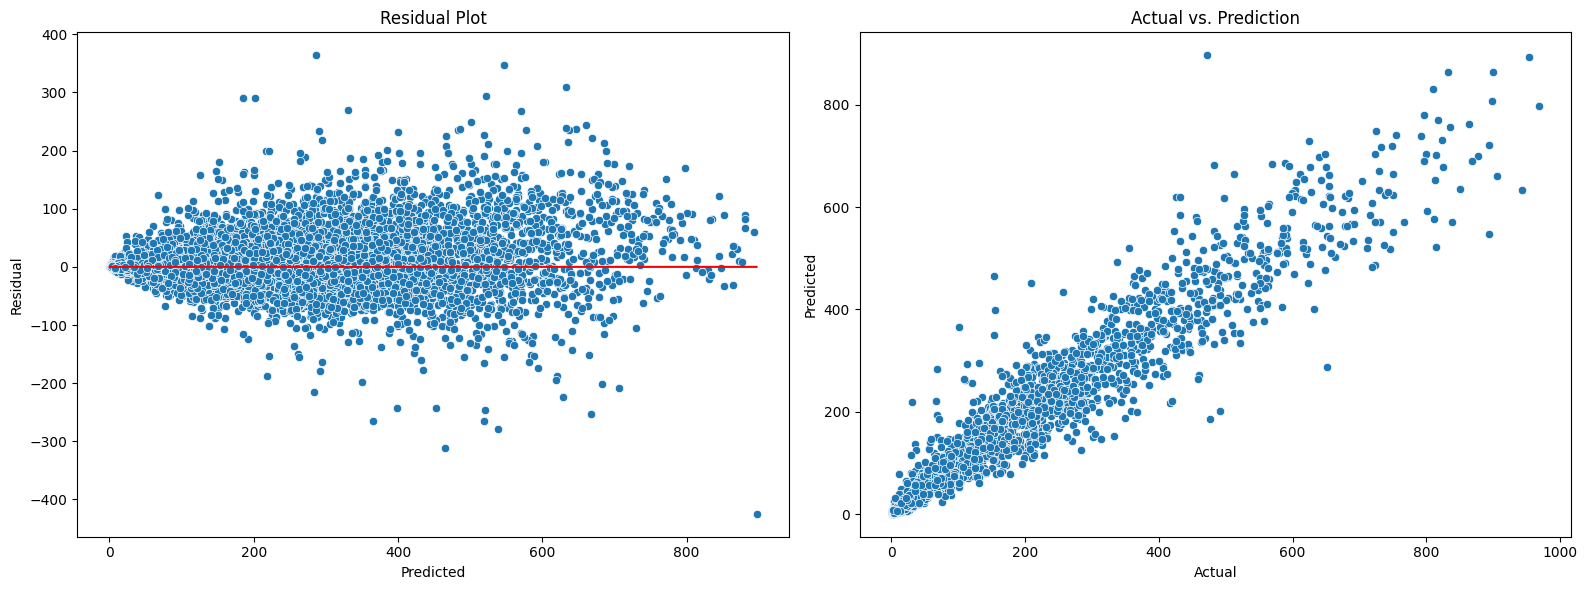

In [60]:
# Residual plot
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.scatterplot(data=df_result, x='y_pred', y='residual').set(title='Residual Plot', xlabel='Predicted', ylabel='Residual')
sns.lineplot(data=df_result, x='y_pred', y=0, color='r')

plt.subplot(1,2,2)
sns.scatterplot(x=ytest, y=y_pred_cb_tuning).set(title='Actual vs. Prediction', xlabel='Actual', ylabel='Predicted')
plt.tight_layout()

A common use of the residuals plot is to analyze the variance of the error of the regressor. From Residual plot we could see :
 - That predicted from 1 to around 570 still get homogeneous, and get wider in Residual axis between -110 to 110, which mean the predicted would miss in error percentage we got, 28.65%
 - In Actual vs Prediction is good enough betweeon 0 to 390, the dots still homogeneous, which mean good when the predict get those number.

### **Feature Importances**

<Axes: title={'center': 'Feature Importances'}>

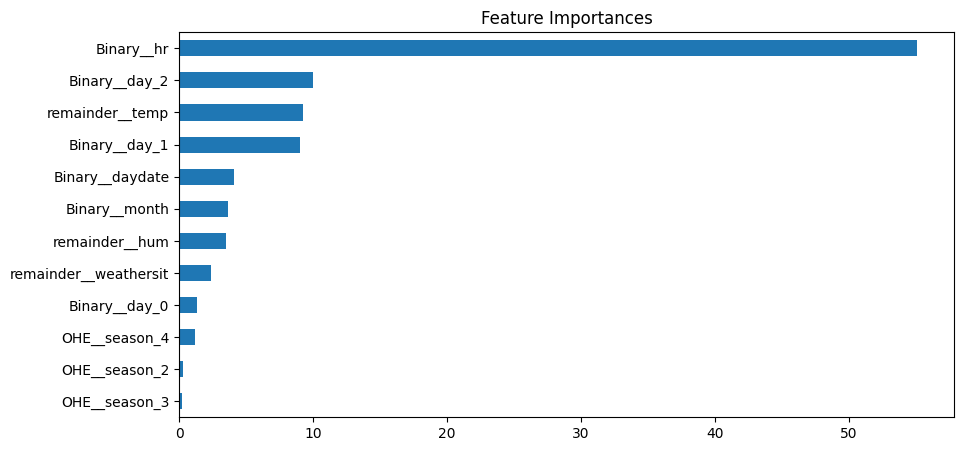

In [65]:
featureImp = pd.Series(cb_tuning['model'].regressor_.feature_importances_, transformer.get_feature_names_out()).sort_values()
plt.figure(figsize=(10,5))
featureImp.plot(kind='barh', title='Feature Importances')

In **CatBoost Regressor** as we could see the barchart above that biggest impact for the count of renters are :
 - Binary_hr, categorical hours (time renters)
 - Binary_day_2, categorical day, in tuesday.
 - temp, temperature when bike got rent.
 - Binary_day_1, categorical day, in monday.
 - Binary_dayate, categorigal date in a month.

## **Conclusion**

- The search for a prediction model for the number of bicycle renters on the bike-sharing dataset involved trying 9 models to find the best model and the 2 best models were selected, namely **Xtreme Gradient Boost Regressor** with a **MAPE** value that has been done by hyperparameter tuning **31.44%** and **Catboost Regressor** with a **MAPE** value that has been done by hyperparameter tuning **28.65%**. 
 - It is clear that the **Catboost Regressor** model is the model of choice for predicting the number of tenants in this dataset with the tuning 'model__regressor__**learning_rate**': **0.1**, 'model__regressor__**l2_leaf_reg**': **5**, 'model__regressor__**iterations**': **1000**, 'model__regressor__**depth**': **8**.
 - Of all the features used, there are 5 best features that are important in the prediction model :<br>
        - Time renters for rent<br>
        - Day two, tuesday<br>
        - Temperature condition of the rental<br>
        - Day one, monday<br>
        - The date of the rental. <br>

## **Business Impact**

- From the conclusion, it can be seen that the error is 28.65%, which means that if predicting the number of bicycles to be provided will miss about 28.65%, if 100 bicycles are predicted, then 28 bicycles can be wasted in provisioning, but this figure is good enough to be on guard with non-member renters(casual), because these non-member renters (casual) cannot be traced easily like member renters (registered), depending on the promotion and expansion of the bike-sharing campaign.
 - By using this prediction model, the bike-sharing system can optimise resource allocation, including the number of bikes provided on certain days and at certain times. This helps to reduce wastage and improve operational efficiency.
  - Knowledge of the key features that influence the number of bike renters allows businesses to design more effective marketing strategies. For example, they can target special promotions on Tuesdays or certain dates that tend to have high demand.
  - By analysing the results of this model, it can make better decisions in terms of investment in the expansion of bicycle rental services that have better weather conditions according to the important features of this model, maintenance of bicycles at certain hours, or improvement of rental facilities.

## **Recommendation**

The error in this model is still quite high, so there is a need for further development such as :
 - Adding new features from existing time development.
 - Experiment with GridSearch
 - Trying other new ensemble models that have accuracy with the dataset.

In [75]:
import pickle

estimator = cb_tuning
estimator.fit(xtrain, ytrain)

pickle.dump(estimator, open('Bike-Sharing(catboostF).sav', 'wb'))

0:	learn: 1.3201076	total: 4ms	remaining: 3.99s
1:	learn: 1.2297401	total: 8.37ms	remaining: 4.17s
2:	learn: 1.1515017	total: 12.1ms	remaining: 4.01s
3:	learn: 1.0768507	total: 15.6ms	remaining: 3.88s
4:	learn: 1.0222019	total: 19.6ms	remaining: 3.9s
5:	learn: 0.9703408	total: 23.2ms	remaining: 3.85s
6:	learn: 0.9220386	total: 26.9ms	remaining: 3.81s
7:	learn: 0.8869462	total: 32.4ms	remaining: 4.02s
8:	learn: 0.8498332	total: 35.9ms	remaining: 3.95s
9:	learn: 0.8050899	total: 39.5ms	remaining: 3.91s
10:	learn: 0.7762017	total: 43.6ms	remaining: 3.92s
11:	learn: 0.7495808	total: 47.3ms	remaining: 3.89s
12:	learn: 0.7264890	total: 51.1ms	remaining: 3.88s
13:	learn: 0.6948483	total: 55.1ms	remaining: 3.88s
14:	learn: 0.6780676	total: 58.9ms	remaining: 3.87s
15:	learn: 0.6621037	total: 62.7ms	remaining: 3.86s
16:	learn: 0.6465872	total: 67.8ms	remaining: 3.92s
17:	learn: 0.6226577	total: 86.8ms	remaining: 4.74s
18:	learn: 0.6105978	total: 89.9ms	remaining: 4.64s
19:	learn: 0.5947701	total